### Building models

100%|██████████| 10/10 [04:11<00:00, 25.12s/it]


-------------------------------------------------------
Finished building 10 models and associated LP problems!
Process took 4.237 minutes to run...


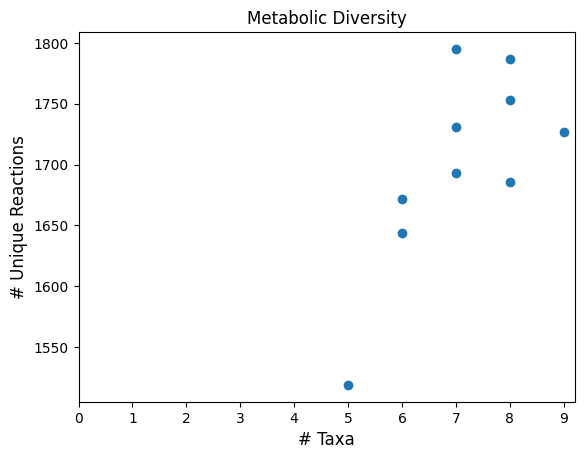

In [23]:
from pymgpipe import *

# If you want to generate a new random normCoverage file, run the following code-
#
# taxa = [x.split('.xml.gz')[0] for x in os.listdir('taxaModels')]
# df = pd.DataFrame(np.random.randint(0,1000,size=(15, 10)),columns=['s'+str(i) for i in range(1,11)],index=taxa)
# rand_zero_one_mask = np.random.randint(2, size=df.shape)
# df = df.where(rand_zero_one_mask==0, 0).apply(lambda x: x/x.sum(),axis=0)
# df.to_csv('normCoverage.csv')

build_models(
    coverage_file='normCoverage.csv',
    taxa_dir='taxaModels',
    out_dir='out',
    diet_fecal_compartments=True,
    coupling_constraints=True,
    remove_reverse_vars_from_lp=True,
    hard_remove=True,
    compress=True,
    threads=-1,
    parallel=True,
    solver='gurobi',
    cobra_type='.xml',
    lp_type='.mps',
    diet='personalized_diet.csv',
    compute_metrics=True
)

### Loading models

In [ ]:
from pymgpipe import *

# Loading a cobra model
cobra_model = load_cobra_model('out/models/mc1.xml.gz')
print(type(cobra_model))

# Loading an optlang model
optlang_model = load_model('out/problems/mc1.mps.7z',solver='gurobi') 
print(type(optlang_model))
# OR 
optlang_model = load_model('out/models/mc1.xml.gz')
print(type(optlang_model))

### Solving models

In [ ]:
from pymgpipe import solve_model, load_model

sol = solve_model(model='out/problems/mc1.mps.7z',solver='gurobi')

# OR 

m = load_model('out/problems/mc1.mps.7z', solver='gurobi')
target_reactions = get_reactions(m,regex='Diet_EX_.*')
sol = solve_model(model=m,reactions=target_reactions)

# OR 

sol = solve_model(model='out/models/mc1.xml.gz',solver='gurobi')

### Computin NMPCs

In [ ]:
from pymgpipe import compute_nmpcs

r = compute_nmpcs(samples='out/problems/',fva_type='regular', write_to_file=False,diet_fecal_compartments=True,force=True, threads=-1)
r.nmpc

### Adding Diets

In [ ]:
from pymgpipe import *

model = load_model('out/problems/mc1.mps.gz')
add_diet_to_model(model,'HighFatLowCarbDiet')
compute_nmpcs(samples=model,write_to_file=False).nmpc